In [3]:
# file_path = '../activity_18350412915.json'
file_path = '../activity_18340016164.json'

In [4]:
file = open(file_path, 'r')
file_content = file.read()
file.close()

In [5]:
import json

data = json.loads(file_content)

In [13]:
lap_list = [lap for activities in data['activities'] for activity in activities['activity_list'] for lap in activity['laps']]
track_points = [track_point for lap in lap_list for track_point in lap['track']['track_points']]
coordinates = [ dict(
    hr=point['heart_rate']['value'],
    distance=point['distance_meters'],
    lat=point['position']['latitude_degrees'],
    long=point['position']['longitude_degrees'],
    alt=point['altitude_meters']) for point in track_points ]

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

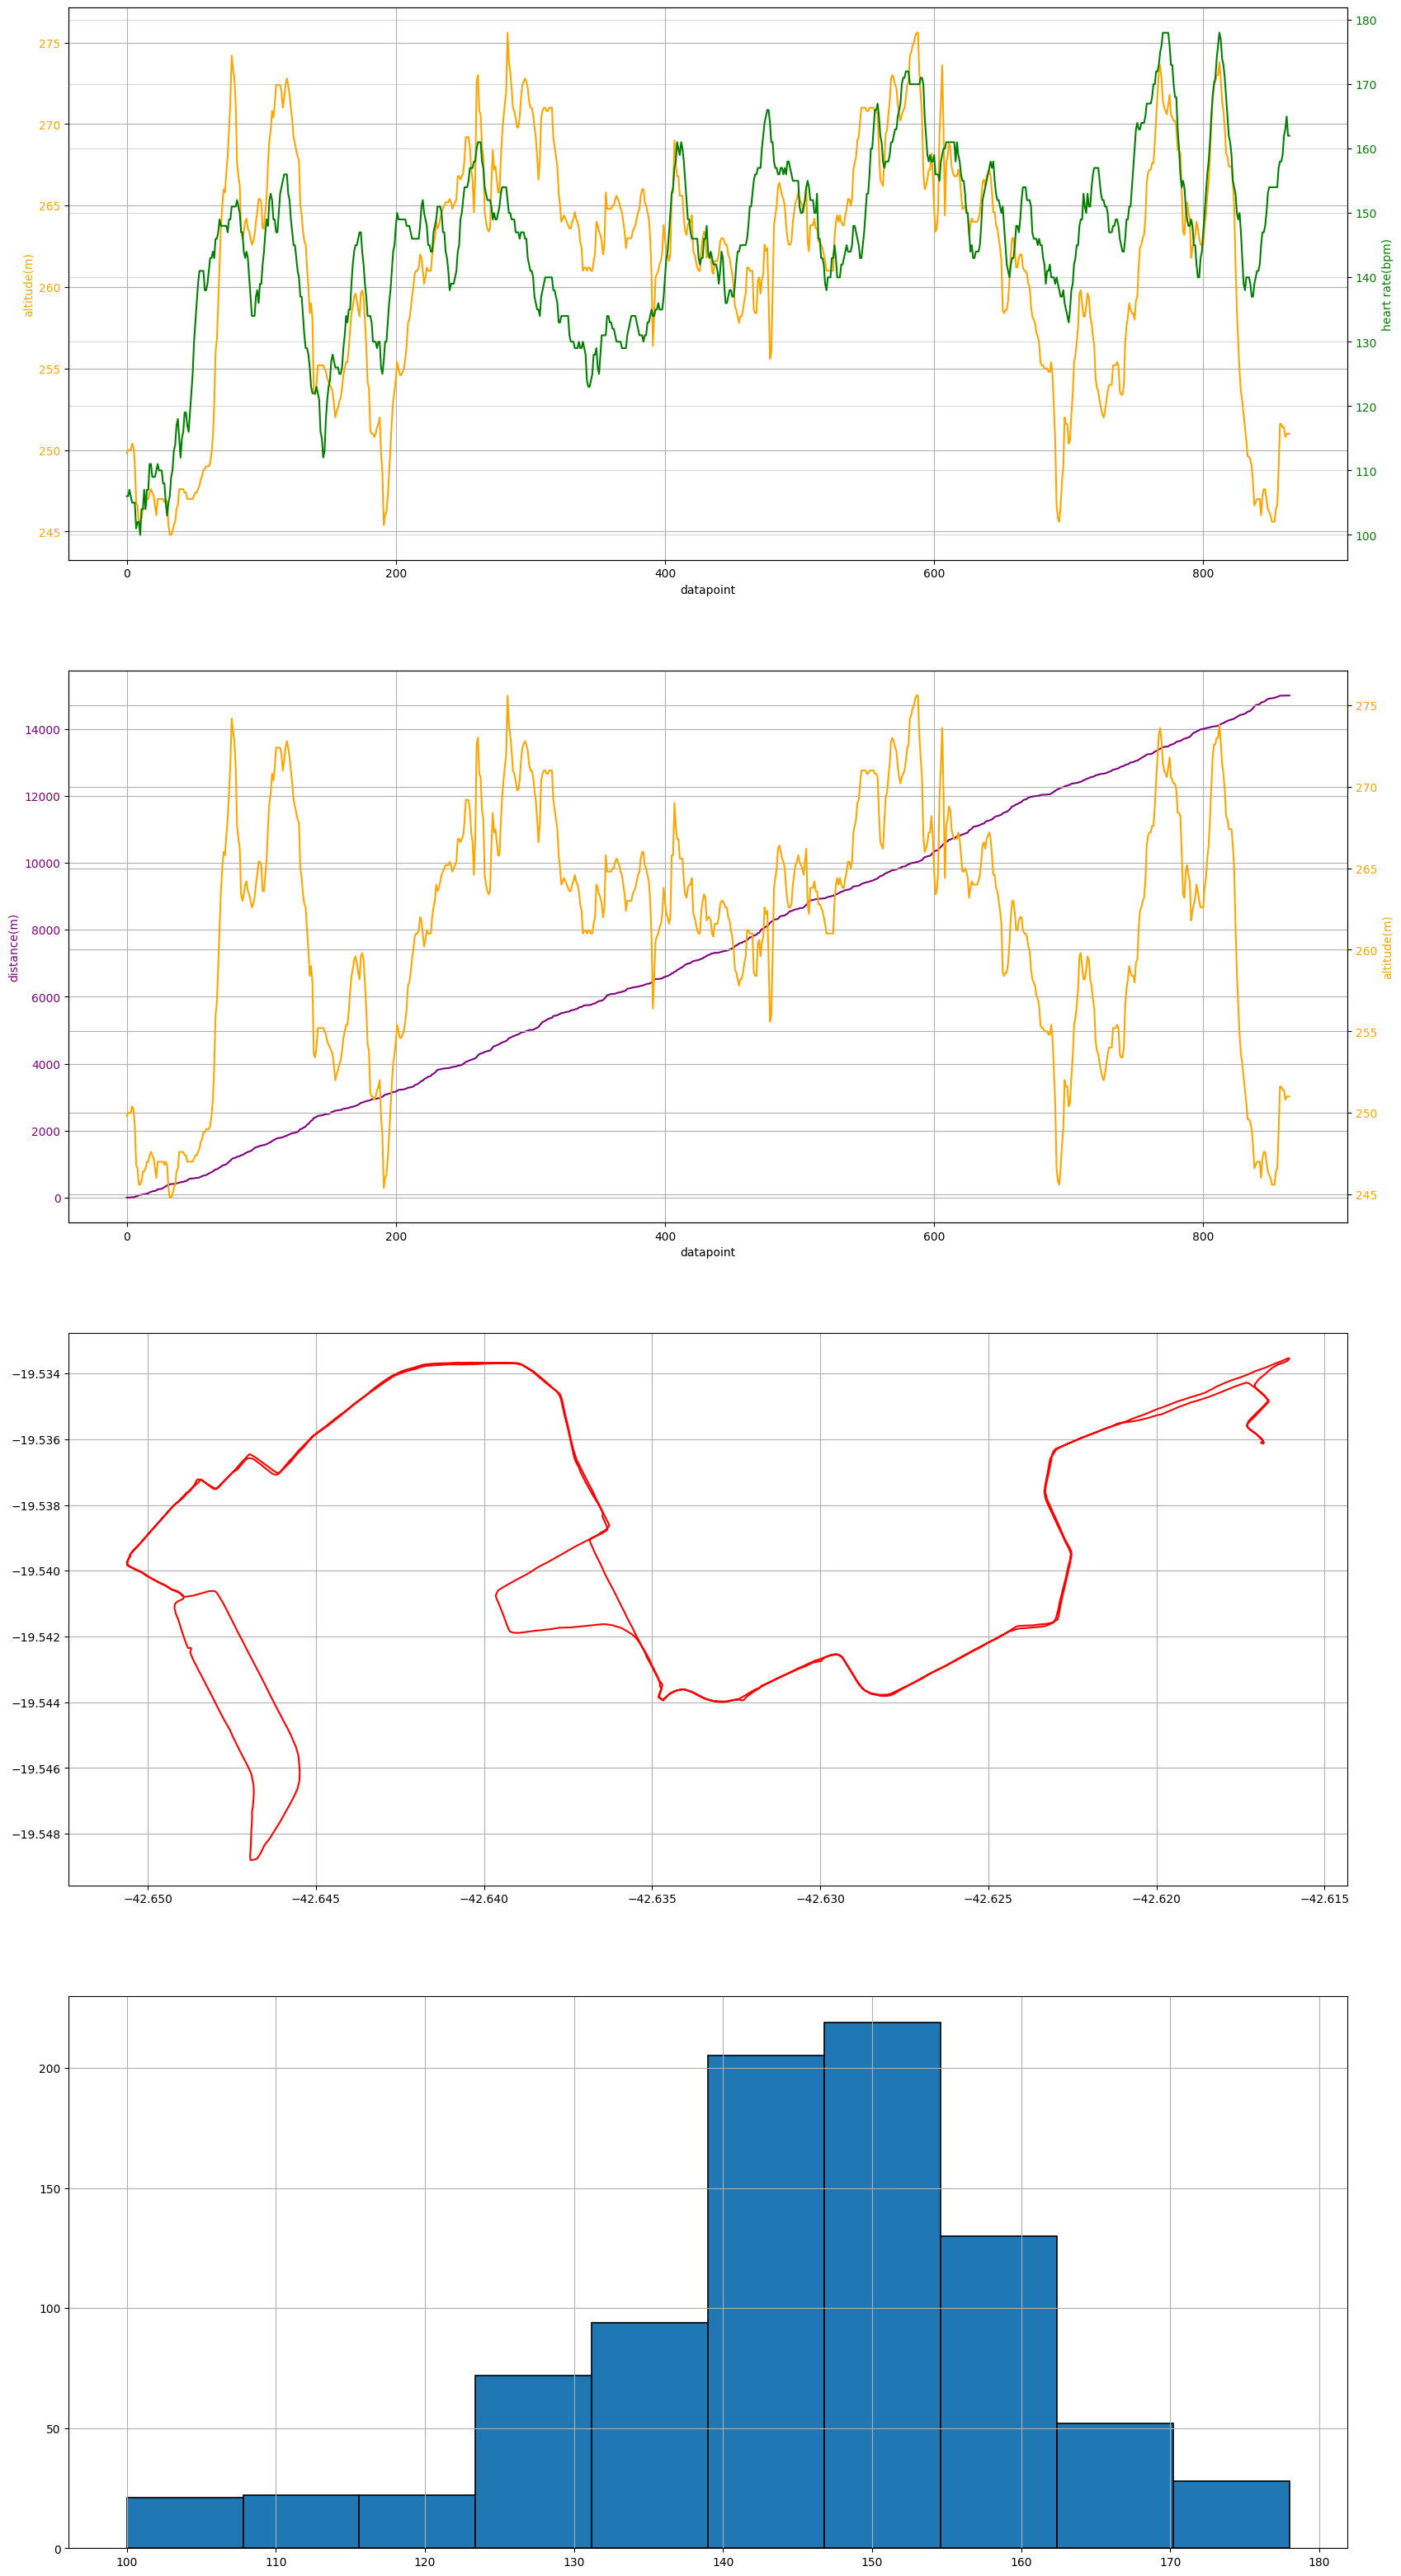

In [52]:
fig, axs = plt.subplots(nrows=4)
fig.set_figheight(40)
fig.set_figwidth(20)

distance = [ coordinate['distance'] for coordinate in coordinates ]
altitude = [ coordinate['alt'] for coordinate in coordinates ]
heart_rate = [ coordinate['hr'] for coordinate in coordinates ]
x = range(0, len(altitude))
lat = [ coordinate['lat'] for coordinate in coordinates ]
long = [ coordinate['long'] for coordinate in coordinates ]

altitude_color='orange'
heart_rate_color='green'
distance_color='purple'

axs[0].set_xlabel('datapoint')
axs[0].set_ylabel('altitude(m)', color=altitude_color)
axs[0].plot(x, altitude, color=altitude_color)
axs[0].tick_params(axis='y', labelcolor=altitude_color)
axs[0].grid()

ax_hr = axs[0].twinx()
ax_hr.set_ylabel('heart rate(bpm)', color=heart_rate_color)
ax_hr.plot(x, heart_rate, color=heart_rate_color)
ax_hr.tick_params(axis='y', labelcolor=heart_rate_color)
ax_hr.grid(which='major', alpha=0.5)

axs[1].set_xlabel('datapoint')
axs[1].set_ylabel('distance(m)', color=distance_color)
axs[1].plot(x, distance, color=distance_color)
axs[1].tick_params(axis='y', labelcolor=distance_color)
axs[1].grid()

ax_alt = axs[1].twinx()
ax_alt.set_ylabel('altitude(m)', color=altitude_color)
ax_alt.plot(x, altitude, color=altitude_color)
ax_alt.tick_params(axis='y', labelcolor=altitude_color)
ax_alt.grid()

axs[2].plot(long, lat, color='red')
axs[2].grid(which='both')

axs[3].hist(heart_rate, edgecolor='black', linewidth=1.2)
axs[3].grid(which='both')

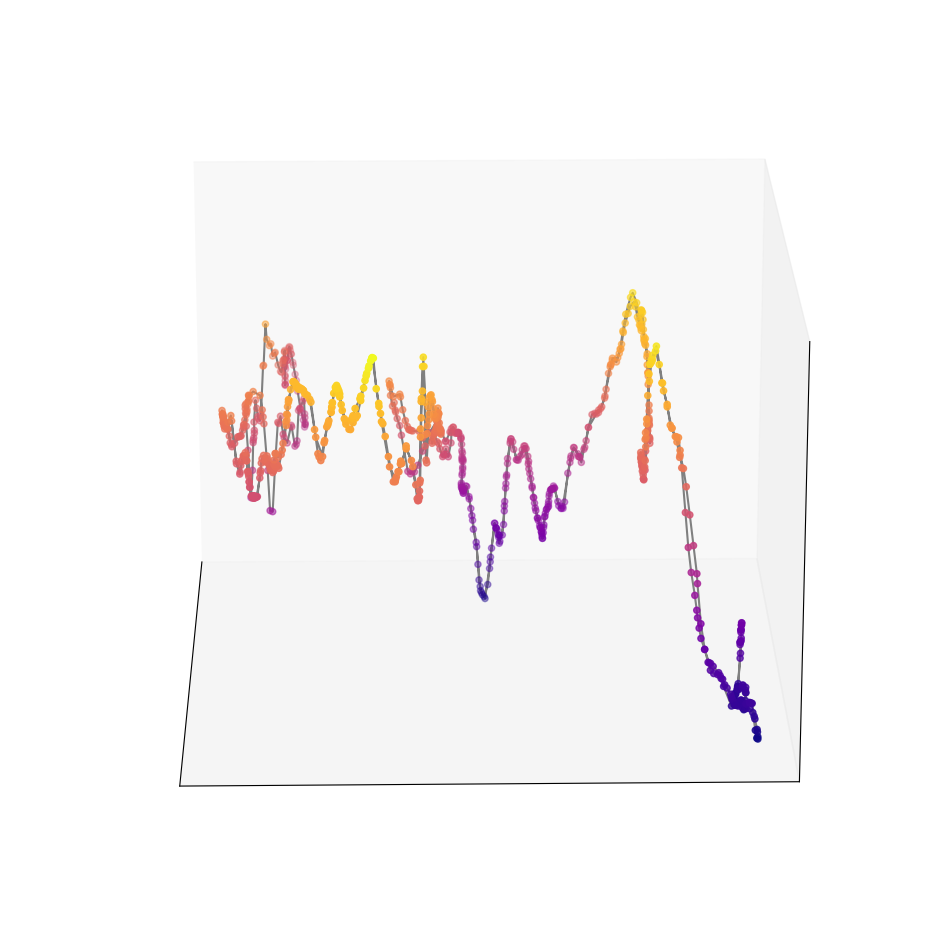

In [13]:
fig1 = plt.figure(figsize=(18,12))
ax3d = plt.axes(projection='3d')

ax3d.get_xaxis().set_ticks([])
ax3d.get_yaxis().set_ticks([])
ax3d.get_zaxis().set_ticks([])

zline = [ coordinate['alt'] for coordinate in coordinates ]
xline = [ coordinate['lat'] for coordinate in coordinates ]
yline = [ coordinate['long'] for coordinate in coordinates ]

ax3d.plot3D(xline, yline, zline, 'gray')
ax3d.scatter3D(xline, yline, zline, c=zline, cmap='plasma');

for ii in range(0,360,1):
    ax3d.view_init(elev=20., azim=ii)
    plt.savefig("movie%d.png" % ii)